### Multivariate forecasting - horizons of 1

Utilizes all the features that were scraped and prepared. The combined dataset that was created will be used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import datetime
import os

from lts import LTSCell
from ltc import LTCCell

In [2]:
COMBINED_DATA = 'D:/Uni/FYP/GitHub/BitForecast/ml/data/combined_data.csv'
data = pd.read_csv(COMBINED_DATA)

In [3]:
data.head()

,Unnamed: 0,date,volume,close,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
0,0,2015-01-01,12820,314.890015,-1.052657,0.195,48,18681.0000,0.129292
1,1,2015-01-02,14729,315.209991,0.101615,0.286,47,9385.0000,0.172895
2,2,2015-01-03,47366,287.130005,-8.908343,0.291,51,57542.1391,0.160714
3,3,2015-01-04,88769,264.720001,-7.804828,0.504,67,7300.0000,0.160599
4,4,2015-01-05,54993,274.839996,3.822905,0.412,73,23092.0000,0.186722


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,date,volume,close,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
0,2015-01-01,12820,314.890015,-1.052657,0.195,48,18681.0000,0.129292
1,2015-01-02,14729,315.209991,0.101615,0.286,47,9385.0000,0.172895
2,2015-01-03,47366,287.130005,-8.908343,0.291,51,57542.1391,0.160714
3,2015-01-04,88769,264.720001,-7.804828,0.504,67,7300.0000,0.160599
4,2015-01-05,54993,274.839996,3.822905,0.412,73,23092.0000,0.186722


### Format data

In [5]:
# Convert date object to datetime
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.set_index('date', inplace=True)

In [9]:
data.rename(columns={ 'close': 'Price' }, inplace=True)
data.head()

,volume,Price,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
date,,,,,,,
2015-01-01,12820,314.890015,-1.052657,0.195,48,18681.0000,0.129292
2015-01-02,14729,315.209991,0.101615,0.286,47,9385.0000,0.172895
2015-01-03,47366,287.130005,-8.908343,0.291,51,57542.1391,0.160714
2015-01-04,88769,264.720001,-7.804828,0.504,67,7300.0000,0.160599
2015-01-05,54993,274.839996,3.822905,0.412,73,23092.0000,0.186722


### Visualize data

In [11]:
from sklearn.preprocessing import minmax_scale

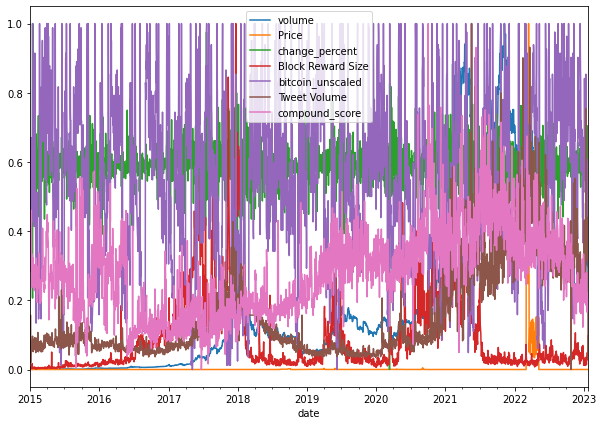

In [13]:
# Scale and plot
scaled_df = pd.DataFrame(
    minmax_scale(data[[
        'Price',
        'volume',
        'change_percent',
        'Block Reward Size',
        'bitcoin_unscaled',
        'Tweet Volume',
        'compound_score'
    ]]),
    columns=data.columns,
    index=data.index
).plot(figsize=(10, 7));

Crazy... plot each separately with the price

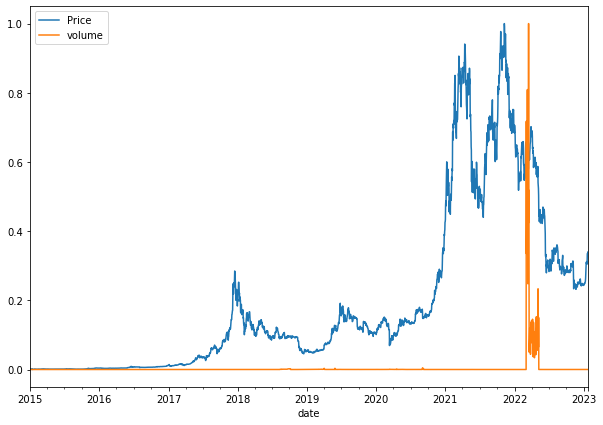

In [18]:
# Scale and plot. Price, Volume
pd.DataFrame(
    minmax_scale(data[[
        'Price',
        'volume',
    ]]),
    columns=['Price', 'volume'],
    index=data.index
).plot(figsize=(10, 7));

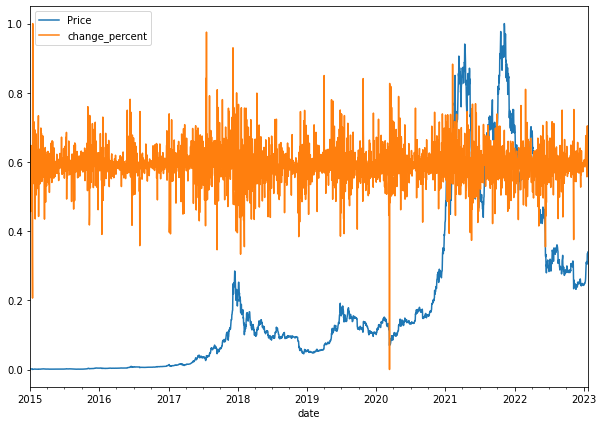

In [19]:
# Scale and plot. Price, change
pd.DataFrame(
    minmax_scale(data[[
        'Price',
        'change_percent',
    ]]),
    columns=['Price', 'change_percent'],
    index=data.index
).plot(figsize=(10, 7));

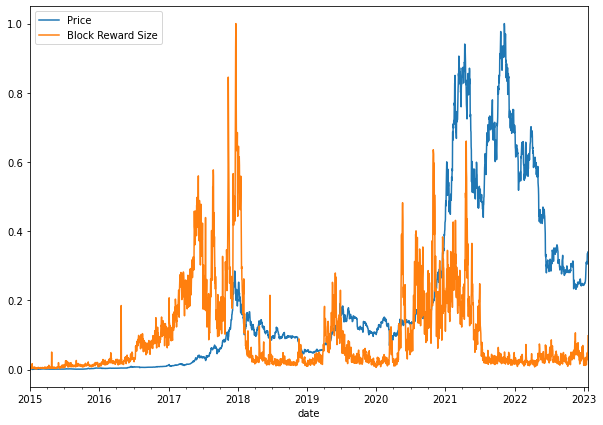

In [20]:
# Scale and plot. Price, block reward
pd.DataFrame(
    minmax_scale(data[[
        'Price',
        'Block Reward Size',
    ]]),
    columns=['Price', 'Block Reward Size'],
    index=data.index
).plot(figsize=(10, 7));

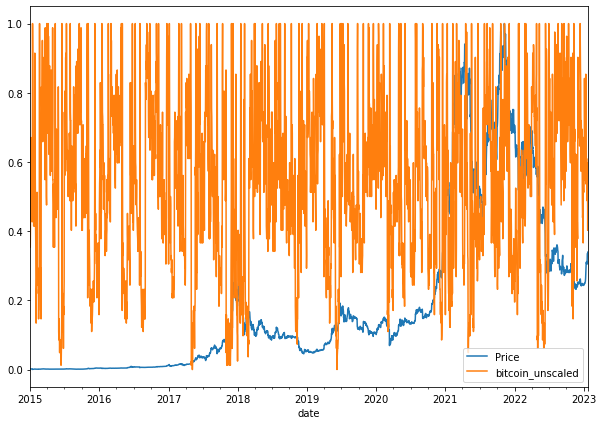

In [21]:
# Scale and plot. Price, google trends
pd.DataFrame(
    minmax_scale(data[[
        'Price',
        'bitcoin_unscaled',
    ]]),
    columns=['Price', 'bitcoin_unscaled'],
    index=data.index
).plot(figsize=(10, 7));

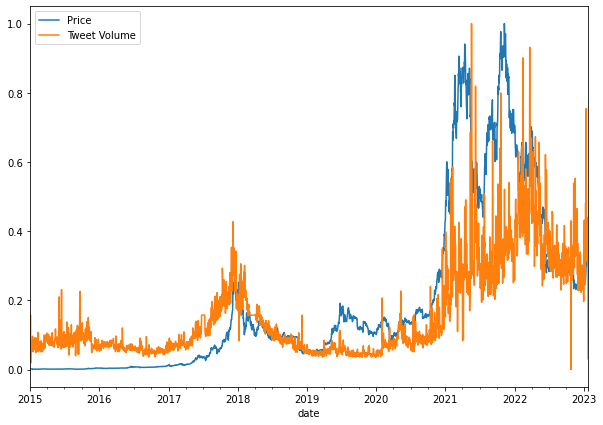

In [23]:
# Scale and plot. Price, twitter volume
pd.DataFrame(
    minmax_scale(data[[
        'Price',
        'Tweet Volume',
    ]]),
    columns=['Price', 'Tweet Volume'],
    index=data.index
).plot(figsize=(10, 7));

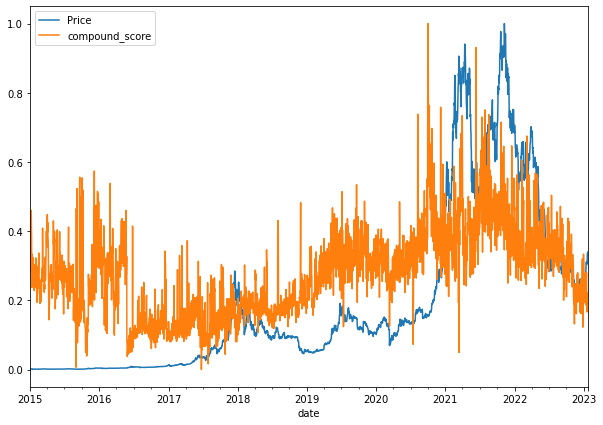

In [24]:
# Scale and plot. Price, twitter sentiment
pd.DataFrame(
    minmax_scale(data[[
        'Price',
        'compound_score',
    ]]),
    columns=['Price', 'compound_score'],
    index=data.index
).plot(figsize=(10, 7));

### Create windowed datasets

In [25]:
HORIZON = 1
WINDOW_SIZE = 7

In [26]:
data_windowed = data.copy()

In [27]:
for i in range(WINDOW_SIZE):
    data_windowed[f'Price+{i+1}'] = data_windowed['Price'].shift(periods=i+1)

data_windowed.head(10)

,volume,Price,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
date,,,,,,,,,,,,,,
2015-01-01,12820,314.890015,-1.052657,0.195,48,18681.0000,0.129292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,14729,315.209991,0.101615,0.286,47,9385.0000,0.172895,314.890015,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,47366,287.130005,-8.908343,0.291,51,57542.1391,0.160714,315.209991,314.890015,NaN,NaN,NaN,NaN,NaN
2015-01-04,88769,264.720001,-7.804828,0.504,67,7300.0000,0.160599,287.130005,315.209991,314.890015,NaN,NaN,NaN,NaN
2015-01-05,54993,274.839996,3.822905,0.412,73,23092.0000,0.186722,264.720001,287.130005,315.209991,314.890015,NaN,NaN,NaN
2015-01-06,21939,282.269989,2.703388,0.325,64,25041.0000,0.239965,274.839996,264.720001,287.130005,315.209991,314.890015,NaN,NaN
2015-01-07,30667,291.339996,3.213238,0.364,55,26987.0000,0.243510,282.269989,274.839996,264.720001,287.130005,315.209991,314.890015,NaN
2015-01-08,20183,282.690002,-2.969038,0.442,63,22546.0000,0.213262,291.339996,282.269989,274.839996,264.720001,287.130005,315.209991,314.890015
2015-01-09,20925,287.970001,1.867770,0.433,58,30439.0000,0.190880,282.690002,291.339996,282.269989,274.839996,264.720001,287.130005,315.209991


In [28]:
# Create X (windows) and y (horizon)
X = data_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = data_windowed.dropna()['Price'].astype(np.float32)

In [29]:
X.head()

,volume,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
date,,,,,,,,,,,,,
2015-01-08,20183.0,-2.969038,0.442,63.0,22546.0,0.213262,291.339996,282.269989,274.839996,264.720001,287.130005,315.209991,314.890015
2015-01-09,20925.0,1.867770,0.433,58.0,30439.0,0.190880,282.690002,291.339996,282.269989,274.839996,264.720001,287.130005,315.209991
2015-01-10,14725.0,-5.076916,0.414,58.0,22162.0,0.098482,287.970001,282.690002,291.339996,282.269989,274.839996,264.720001,287.130005
2015-01-11,15111.0,-3.138839,0.349,54.0,20760.0,0.161249,273.350006,287.970001,282.690002,291.339996,282.269989,274.839996,264.720001
2015-01-12,25385.0,1.722249,0.921,53.0,24861.0,0.119985,264.769989,273.350006,287.970001,282.690002,291.339996,282.269989,274.839996


In [30]:
y.head()

date
2015-01-08    282.690002
2015-01-09    287.970001
2015-01-10    273.350006
2015-01-11    264.769989
2015-01-12    269.329987
Name: Price, dtype: float32

In [31]:
split_size = int(len(X) * .8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2351, 2351, 588, 588)

### Create performant tensorflow datasets

In [32]:
# create tensorflow Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features and labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# batch and prefetch for optimal performance
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

### Create callback functions

In [30]:
# Model checkpoint with a specific filename
def create_model_checkpoint(model_name, save_path='model_checkpoints', monitor_dataset_loss=False):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True,
        monitor='loss' if monitor_dataset_loss else 'val_loss',
    )

# Create a tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
    )

    print(f'Saving TensorBoard log files to: {log_dir}')
    return tensorboard_callback

# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=200,
    restore_best_weights=True
)

# create reduce lr on plateau callback
reduce_lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    patience=100,
    verbose=1
)

### Create ensemble model architecture of univariate

In [34]:
# Create a function to create an ensemble of models
def create_ensemble(
    num_models=10,
    num_epochs=5000,
    horizon=HORIZON,
    train_data=train_dataset,
    test_data=test_dataset,
    loss_fns=['mae', 'mse', 'mape']
):
    ensemble = []

    for i in range(num_models):
        for loss_fn in loss_fns:
            print(f'Model loss: {loss_fn} | model number: {i}')
            model = tf.keras.Sequential([
                tf.keras.layers.Input(
                    shape=(WINDOW_SIZE)
                ),
                tf.keras.layers.Lambda(
                    lambda x: tf.expand_dims(x, axis=1)
                ),
                tf.keras.layers.RNN(
                    LTSCell(16),
                    time_major=True,
                    return_sequences=True
                ),
                tf.keras.layers.LSTM(
                    16,
                    activation='relu'
                ),
                tf.keras.layers.Dense(
                    128,
                    
                    # This is required for the prediction intervals
                    kernel_initializer='he_normal',
                    activation='relu'
                ),
                tf.keras.layers.Dense(
                    128,
                    kernel_initializer='he_normal',
                    activation='relu'
                ),
                tf.keras.layers.Dense(HORIZON)
            ])

            model.compile(
                loss=loss_fn,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse']
            )

            model.fit(
                train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[
                    early_stopping,
                    reduce_lr_plateau
                ]
            )

            ensemble.append(model)

    return ensemble

In [35]:
ensemble = create_ensemble()

Model loss: mae | model number: 0

Epoch 118: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 316: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 418: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 518: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Model loss: mse | model number: 0

Epoch 143: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 243: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Model loss: mape | model number: 0

Epoch 177: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 313: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 422: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 522: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Model loss: mae | model number: 1

Epoch 278: ReduceLROnPlateau reducing learning rate to 0.00010


Epoch 540: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.


In [36]:
# Create a function to return a list of predictions from an emsemble
def make_ensemble_preds(ensemble, data):
    preds = []
    for model in ensemble:
        preds.append(model.predict(data))
        
    return tf.constant(tf.squeeze(preds))

In [37]:
ensemble_preds = make_ensemble_preds(
    ensemble,
    test_dataset
)

ensemble_preds

1/1 [==============================] - 0s 133ms/step


<tf.Tensor: shape=(30, 588), dtype=float32, numpy=
array([[41284.902, 39806.547, 38501.47 , ..., 21608.008, 25817.3  ,
        14063.784],
       [39665.863, 37209.914, 35955.438, ..., 18122.082, 20957.078,
        26229.947],
       [37421.68 , 39251.355, 41919.9  , ..., 21688.803, 22920.234,
        22286.69 ],
       ...,
       [40817.473, 40537.984, 38253.33 , ..., 22474.826, 23214.549,
        23453.873],
       [38479.285, 40042.203, 42925.676, ..., 23245.006, 22448.928,
         8548.232],
       [40511.21 , 42951.355, 42396.164, ..., 23092.113, 24462.703,
        11489.999]], dtype=float32)>

The median is the better option, as mentioned in univariate

In [31]:
'''
Create MASE function (Not in tf API)
recommended in the time series forecasting book
https://otexts.com/fpp3/intro.html

btc price forecasting in non-seasonal
shift by 1 cuz seasonality is 1 day (collect data each day)
'''
def mean_absolute_scaled_error(y_true, y_pred):
    # Better to perform tf subtraction due to nan possibilities
    mae = tf.reduce_mean(
        tf.abs(tf.subtract(y_true, y_pred))
    )
    mae_naive_no_season = tf.reduce_mean(
        tf.abs(tf.subtract(y_true[1:], y_true[:-1]))
    )
    
    return mae / mae_naive_no_season

# Create a function to evaluate the predictions against the test set
def evaluate(y_true, y_pred):
    mae = tf.keras.metrics.mean_absolute_error(
        y_true,
        y_pred
    )
    mse = tf.keras.metrics.mean_squared_error(
        y_true,
        y_pred
    )
    mape = tf.keras.metrics.mean_absolute_percentage_error(
        y_true,
        y_pred
    )
    rmse = tf.sqrt(mse)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': f'{mape.numpy()}%',
        'mase': mase.numpy(),
    }

In [39]:
median_preds = np.median(
    ensemble_preds,
    axis=0
)

ensemble_results = evaluate(
    y_test,
    median_preds
)

ensemble_results

{'mae': 1575.5402,
 'mse': 4726547.0,
 'rmse': 2174.0623,
 'mape': '4.655498027801514%',
 'mase': 1.8341575}

**Results are quite underwhelming. Remove the volume and change percent values as they are meaningless**

In [40]:
data.head()

,volume,Price,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
date,,,,,,,
2015-01-01,12820,314.890015,-1.052657,0.195,48,18681.0000,0.129292
2015-01-02,14729,315.209991,0.101615,0.286,47,9385.0000,0.172895
2015-01-03,47366,287.130005,-8.908343,0.291,51,57542.1391,0.160714
2015-01-04,88769,264.720001,-7.804828,0.504,67,7300.0000,0.160599
2015-01-05,54993,274.839996,3.822905,0.412,73,23092.0000,0.186722


In [41]:
data.drop(['volume', 'change_percent'], axis=1, inplace=True)

In [42]:
data.head()

,Price,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
date,,,,,
2015-01-01,314.890015,0.195,48,18681.0000,0.129292
2015-01-02,315.209991,0.286,47,9385.0000,0.172895
2015-01-03,287.130005,0.291,51,57542.1391,0.160714
2015-01-04,264.720001,0.504,67,7300.0000,0.160599
2015-01-05,274.839996,0.412,73,23092.0000,0.186722


In [43]:
data_windowed_2 = data.copy()
for i in range(WINDOW_SIZE):
    data_windowed_2[f'Price+{i+1}'] = data_windowed_2['Price'].shift(periods=i+1)
    
data_windowed_2.head(10)    

,Price,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
date,,,,,,,,,,,,
2015-01-01,314.890015,0.195,48,18681.0000,0.129292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,315.209991,0.286,47,9385.0000,0.172895,314.890015,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,287.130005,0.291,51,57542.1391,0.160714,315.209991,314.890015,NaN,NaN,NaN,NaN,NaN
2015-01-04,264.720001,0.504,67,7300.0000,0.160599,287.130005,315.209991,314.890015,NaN,NaN,NaN,NaN
2015-01-05,274.839996,0.412,73,23092.0000,0.186722,264.720001,287.130005,315.209991,314.890015,NaN,NaN,NaN
2015-01-06,282.269989,0.325,64,25041.0000,0.239965,274.839996,264.720001,287.130005,315.209991,314.890015,NaN,NaN
2015-01-07,291.339996,0.364,55,26987.0000,0.243510,282.269989,274.839996,264.720001,287.130005,315.209991,314.890015,NaN
2015-01-08,282.690002,0.442,63,22546.0000,0.213262,291.339996,282.269989,274.839996,264.720001,287.130005,315.209991,314.890015
2015-01-09,287.970001,0.433,58,30439.0000,0.190880,282.690002,291.339996,282.269989,274.839996,264.720001,287.130005,315.209991


In [44]:
X = data_windowed_2.dropna().drop('Price', axis=1).astype(np.float32)
y = data_windowed_2.dropna()['Price'].astype(np.float32)

X.head(), y.head()

(            Block Reward Size  bitcoin_unscaled  Tweet Volume  compound_score  \
 date                                                                            
 2015-01-08              0.442              63.0       22546.0        0.213262   
 2015-01-09              0.433              58.0       30439.0        0.190880   
 2015-01-10              0.414              58.0       22162.0        0.098482   
 2015-01-11              0.349              54.0       20760.0        0.161249   
 2015-01-12              0.921              53.0       24861.0        0.119985   
 
                Price+1     Price+2     Price+3     Price+4     Price+5  \
 date                                                                     
 2015-01-08  291.339996  282.269989  274.839996  264.720001  287.130005   
 2015-01-09  282.690002  291.339996  282.269989  274.839996  264.720001   
 2015-01-10  287.970001  282.690002  291.339996  282.269989  274.839996   
 2015-01-11  273.350006  287.970001  282.690002  

In [45]:
split_size = int(len(X) * .8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

# create tensorflow Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features and labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# batch and prefetch for optimal performance
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 11), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 11), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [34]:
# Create a function to create an ensemble of models
def create_ensemble(
    num_models=10,
    num_epochs=5000,
    horizon=HORIZON,
    train_data=train_dataset,
    test_data=test_dataset,
    loss_fns=['mae', 'mse', 'mape']
):
    ensemble = []

    for i in range(num_models):
        for loss_fn in loss_fns:
            print(f'Model loss: {loss_fn} | model number: {i}')
            model = tf.keras.Sequential([
                tf.keras.layers.Input(
                    shape=(WINDOW_SIZE)
                ),
                tf.keras.layers.Lambda(
                    lambda x: tf.expand_dims(x, axis=1)
                ),
                tf.keras.layers.RNN(
                    LTSCell(16),
                    time_major=True,
                    return_sequences=True
                ),
                tf.keras.layers.LSTM(
                    16,
                    activation='relu'
                ),
                tf.keras.layers.Dense(
                    128,
                    
                    # This is required for the prediction intervals
                    kernel_initializer='he_normal',
                    activation='relu'
                ),
                tf.keras.layers.Dense(
                    128,
                    kernel_initializer='he_normal',
                    activation='relu'
                ),
                tf.keras.layers.Dense(HORIZON)
            ])

            model.compile(
                loss=loss_fn,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse']
            )

            model.fit(
                train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[
                    early_stopping,
                    reduce_lr_plateau
                ]
            )

            ensemble.append(model)

    return ensemble

In [35]:
ensemble_2 = create_ensemble()

Model loss: mae | model number: 0

Epoch 694: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1727: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1827: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Model loss: mse | model number: 0

Epoch 473: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 573: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Model loss: mape | model number: 0

Epoch 164: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 2121: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 2230: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 2330: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Model loss: mae | model number: 1

Epoch 297: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 528: ReduceLROnPlateau reducing learning rate to 1.

In [36]:
ensemble_preds_2 = make_ensemble_preds(
    ensemble_2,
    test_dataset
)

ensemble_preds_2

1/1 [==============================] - 0s 92ms/step


<tf.Tensor: shape=(30, 588), dtype=float32, numpy=
array([[40641.484, 38117.367, 38957.39 , ..., 22655.77 , 22514.266,
        23155.87 ],
       [41554.27 , 38577.137, 39967.957, ..., 22605.197, 21925.377,
        22884.49 ],
       [40808.883, 38083.766, 38080.047, ..., 22820.123, 22926.297,
        22874.785],
       ...,
       [40574.664, 39056.85 , 38770.367, ..., 22516.207, 22199.91 ,
        22900.594],
       [41512.31 , 41536.766, 39736.09 , ..., 22507.684, 22434.092,
        22445.02 ],
       [40280.965, 39774.594, 39289.023, ..., 22235.22 , 21882.428,
        23272.703]], dtype=float32)>

In [37]:
median_preds_2 = np.median(
    ensemble_preds_2,
    axis=0
)

ensemble_results_2 = evaluate(
    y_test,
    median_preds_2
)

ensemble_results_2

{'mae': 932.3086,
 'mse': 1826788.8,
 'rmse': 1351.5875,
 'mape': '2.667914390563965%',
 'mase': 1.0856677}

Results are indeed better... so it seems that those features were just acting as noise

In [38]:
# Create naive forecast prediction
naive_forecast = y_test[:-1]
naive_forecast_results = evaluate(y_test[1:], naive_forecast)
naive_forecast_results

{'mae': 858.74207,
 'mse': 1631648.0,
 'rmse': 1277.3597,
 'mape': '2.4183554649353027%',
 'mase': 0.9988591}

In [39]:
# Save ensemble in case of future requirements
for i, model in enumerate(ensemble_2):
    model.save(f'models/ensemble_multivariate/model_{i}')

INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_0\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_1\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_2\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_3\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_4\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_5\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_6\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_7\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_8\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_9\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_10\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate/model_11\assets
INFO:tensorflow:Assets written to: models/ensemble

In [40]:
eval_frame = pd.DataFrame({
    'naive_forecast_results': naive_forecast_results,
    'ensemble_results_2': ensemble_results_2
}).transpose()

eval_frame

,mae,mse,rmse,mape,mase
naive_forecast_results,858.742065,1631648.0,1277.359741,2.4183554649353027%,0.998859
ensemble_results_2,932.308594,1826788.75,1351.587524,2.667914390563965%,1.085668


Results are satisfactory... as the result is close to the naive forecast

In [41]:
# Save metric values in case of ui requirements
eval_frame.to_csv('data/multivariate_evaluation.csv')

#### Uncertainty estimates for price ranges

In [42]:
def get_upper_lower(preds):
    std = tf.math.reduce_std(preds, axis=0)
    # 1.96 is the 97.5th percentile point
    interval = 1.96 * std
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

In [43]:
lower, upper = get_upper_lower(ensemble_preds_2)
med_ensemble_preds = np.median(ensemble_preds_2, axis=0)
print(f'lower bound: {lower[:10]}')
print(f'upper bound: {upper[:10]}')
print(f'point forecast: {med_ensemble_preds[:10]}')

lower bound: [39677.203 37374.996 37047.152 35057.5   34641.44  34360.723 30754.371
 31099.637 31687.81  32270.371]
upper bound: [41770.15  41477.902 40141.27  37813.844 36822.934 35959.637 33772.145
 33250.637 34920.625 35258.76 ]
point forecast: [40676.39  39231.188 38466.766 36366.094 35699.78  35115.4   32254.844
 32236.86  33452.805 33896.668]


### Demo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import datetime
import os

from lts import LTSCell

### Import and format data

In [2]:
COMBINED_DATA = 'D:/Uni/FYP/GitHub/BitForecast/ml/data/combined_data_2.csv'
data = pd.read_csv(COMBINED_DATA)

In [3]:
data.head()

,Unnamed: 0,date,volume,close,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
0,0,2015-01-01,12820,314.890015,-1.052657,0.195,48,18681.000000,0.129292
1,1,2015-01-02,14729,315.209991,0.101615,0.286,47,9385.000000,0.172895
2,2,2015-01-03,47366,287.130005,-8.908343,0.291,51,57556.728374,0.160714
3,3,2015-01-04,88769,264.720001,-7.804828,0.504,67,7300.000000,0.160599
4,4,2015-01-05,54993,274.839996,3.822905,0.412,73,23092.000000,0.186722


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,date,volume,close,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
0,2015-01-01,12820,314.890015,-1.052657,0.195,48,18681.000000,0.129292
1,2015-01-02,14729,315.209991,0.101615,0.286,47,9385.000000,0.172895
2,2015-01-03,47366,287.130005,-8.908343,0.291,51,57556.728374,0.160714
3,2015-01-04,88769,264.720001,-7.804828,0.504,67,7300.000000,0.160599
4,2015-01-05,54993,274.839996,3.822905,0.412,73,23092.000000,0.186722


In [5]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.rename(columns={ 'close': 'Price' }, inplace=True)
data.drop(['volume', 'change_percent'], axis=1, inplace=True)
data.head()

,Price,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
date,,,,,
2015-01-01,314.890015,0.195,48,18681.000000,0.129292
2015-01-02,315.209991,0.286,47,9385.000000,0.172895
2015-01-03,287.130005,0.291,51,57556.728374,0.160714
2015-01-04,264.720001,0.504,67,7300.000000,0.160599
2015-01-05,274.839996,0.412,73,23092.000000,0.186722


### Create windowed datasets

In [6]:
HORIZON = 1
WINDOW_SIZE = 7

data_windowed = data.copy()
for i in range(WINDOW_SIZE):
    data_windowed[f'Price+{i+1}'] = data_windowed['Price'].shift(periods=i+1)

data_windowed.head(10)

,Price,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
date,,,,,,,,,,,,
2015-01-01,314.890015,0.195,48,18681.000000,0.129292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,315.209991,0.286,47,9385.000000,0.172895,314.890015,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,287.130005,0.291,51,57556.728374,0.160714,315.209991,314.890015,NaN,NaN,NaN,NaN,NaN
2015-01-04,264.720001,0.504,67,7300.000000,0.160599,287.130005,315.209991,314.890015,NaN,NaN,NaN,NaN
2015-01-05,274.839996,0.412,73,23092.000000,0.186722,264.720001,287.130005,315.209991,314.890015,NaN,NaN,NaN
2015-01-06,282.269989,0.325,64,25041.000000,0.239965,274.839996,264.720001,287.130005,315.209991,314.890015,NaN,NaN
2015-01-07,291.339996,0.364,55,26987.000000,0.243510,282.269989,274.839996,264.720001,287.130005,315.209991,314.890015,NaN
2015-01-08,282.690002,0.442,63,22546.000000,0.213262,291.339996,282.269989,274.839996,264.720001,287.130005,315.209991,314.890015
2015-01-09,287.970001,0.433,58,30439.000000,0.190880,282.690002,291.339996,282.269989,274.839996,264.720001,287.130005,315.209991


In [7]:
# Create X (windows) and y (horizon)
X = data_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = data_windowed.dropna()['Price'].astype(np.float32)

In [8]:
split_size = int(len(X) * .8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2351, 2351, 588, 588)

### Create performant tensorflow datasets

In [9]:
# create tensorflow Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features and labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# batch and prefetch for optimal performance
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 11), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 11), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [10]:
# Predictions
def make_ensemble_preds(ensemble, data):
    preds = []
    for model in ensemble:
        preds.append(model.predict(data))
        
    return tf.constant(tf.squeeze(preds))

In [11]:
# Uncertainty estimates
def get_upper_lower(preds):
    std = tf.math.reduce_std(preds, axis=0)
    # 1.96 is the 97.5th percentile point
    interval = 1.96 * std
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

In [12]:
# Import models
MODELS_PATH = './models/ensemble_multivariate'
ensemble = [tf.keras.models.load_model(f'{MODELS_PATH}/{model}') for model in os.listdir(MODELS_PATH)]

In [13]:
ensemble_preds = make_ensemble_preds(
    ensemble,
    test_dataset
)

1/1 [==============================] - 0s 98ms/step


In [19]:
lower, upper = get_upper_lower(ensemble_preds)
med_ensemble_preds = np.median(ensemble_preds, axis=0)
print(f'lower bound: {lower[:10]}')
print(f'upper bound: {upper[:10]}')
print(f'point forecast: {med_ensemble_preds[:10]}')

lower bound: [39677.207 37375.    37047.15  35057.5   34641.445 34360.723 30754.371
 31099.637 31687.81  32270.37 ]
upper bound: [41770.152 41477.906 40141.266 37813.844 36822.938 35959.637 33772.145
 33250.637 34920.625 35258.76 ]
point forecast: [40676.39  39231.188 38466.766 36366.094 35699.78  35115.4   32254.844
 32236.86  33452.805 33896.668]


In [20]:
y_test.index[:10]

DatetimeIndex(['2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19',
               '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
               '2021-06-24', '2021-06-25'],
              dtype='datetime64[ns]', name='date', freq=None)

### Make predictions in future

In order to actually predict into the future, the model must now be trained on the complete dataset. As the same architecture has already been evaluated and fine tuned, the best performing architecture can be used, but this time, having trained on the entire dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import datetime
import os

from lts import LTSCell

In [26]:
HORIZON = 1
WINDOW_SIZE = 7
BATCH_SIZE = 1024
COMBINED_DATA = 'D:/Uni/FYP/GitHub/BitForecast/ml/data/combined_data.csv'

# Create the required dataset format
def create_dataset():
    # Import data
    data = pd.read_csv(COMBINED_DATA)

    # Clean up data
    data.drop(['Unnamed: 0'], axis=1, inplace=True)
    data.drop(['volume', 'change_percent'], axis=1, inplace=True)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    data.rename(columns={ 'close': 'Price' }, inplace=True)

    # Create window datasets
    data_windowed = data.copy()
    for i in range(WINDOW_SIZE):
        data_windowed[f'Price+{i+1}'] = data_windowed['Price'].shift(periods=i+1)

    # Create X and y
    X_all = data_windowed.dropna().drop('Price', axis=1).astype(np.float32)
    y_all = data_windowed.dropna()['Price'].astype(np.float32)

    # Convert tensorflow datasets
    features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
    labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
    dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))
    dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return {
        'data': data,
        'data_windowed': data_windowed,
        'y_all': y_all,
        'X_all': X_all,
        'dataset_all': dataset_all,
    }

# Create an ensemble of models
def create_ensemble(
    num_models=10,
    num_epochs=5000,
    horizon=HORIZON,
    loss_fns=['mae', 'mse', 'mape']
):
    data = create_dataset()
    ensemble = []

    for i in range(num_models):
        for loss_fn in loss_fns:
            print(f'Model loss: {loss_fn} | model number: {i}')
            model = tf.keras.Sequential([
                tf.keras.layers.Input(
                    shape=(WINDOW_SIZE)
                ),
                tf.keras.layers.Lambda(
                    lambda x: tf.expand_dims(x, axis=1)
                ),
                tf.keras.layers.RNN(
                    LTSCell(16),
                    time_major=True,
                    return_sequences=True
                ),
                tf.keras.layers.LSTM(
                    16,
                    activation='relu'
                ),
                tf.keras.layers.Dense(
                    128,
                    
                    # This is required for the prediction intervals
                    kernel_initializer='he_normal',
                    activation='relu'
                ),
                tf.keras.layers.Dense(
                    128,
                    kernel_initializer='he_normal',
                    activation='relu'
                ),
                tf.keras.layers.Dense(HORIZON)
            ])

            model.compile(
                loss=loss_fn,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse']
            )

            model.fit(
                data['dataset_all'],
                epochs=num_epochs,
                verbose=0,
            )

            ensemble.append(model)

    return ensemble

# Create prediction uncertainty estimates
def get_upper_lower(preds):
    std = tf.math.reduce_std(preds, axis=0)
    # 1.96 is the 97.5th percentile point
    interval = 1.96 * std
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

# Return dates from start_date to start_date+into_future
def get_future_dates(start_date, into_future, offset=1):
    start_date = start_date + np.timedelta64(offset, 'D')
    end_date = start_date + np.timedelta64(into_future, 'D')
    return np.arange(start_date, end_date, dtype='datetime64[D]')

# Create a helper plotting function
def plot_time_series(
    timesteps,
    prices,
    format='.',
    start=0,
    end=None,
    label=None
):
    plt.plot(timesteps[start:end], prices[start:end], format, label=label)
    plt.xlabel('Date')
    plt.ylabel('Price')
    if label:
        plt.legend(fontsize=14)

    # Display a grid for easier measurement readings
    plt.grid(True)

In [5]:
ensemble = create_ensemble()

Model loss: mae | model number: 0
Model loss: mse | model number: 0
Model loss: mape | model number: 0
Model loss: mae | model number: 1
Model loss: mse | model number: 1
Model loss: mape | model number: 1
Model loss: mae | model number: 2
Model loss: mse | model number: 2
Model loss: mape | model number: 2
Model loss: mae | model number: 3
Model loss: mse | model number: 3
Model loss: mape | model number: 3
Model loss: mae | model number: 4
Model loss: mse | model number: 4
Model loss: mape | model number: 4
Model loss: mae | model number: 5
Model loss: mse | model number: 5
Model loss: mape | model number: 5
Model loss: mae | model number: 6
Model loss: mse | model number: 6
Model loss: mape | model number: 6
Model loss: mae | model number: 7
Model loss: mse | model number: 7
Model loss: mape | model number: 7
Model loss: mae | model number: 8
Model loss: mse | model number: 8
Model loss: mape | model number: 8
Model loss: mae | model number: 9
Model loss: mse | model number: 9
Model

In [6]:
# Save ensemble in case of future requirements
for i, model in enumerate(ensemble):
    model.save(f'models/ensemble_multivariate_complete/model_{i}')

INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_0\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_1\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_2\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_3\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_4\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_5\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_6\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_7\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_8\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_9\assets
INFO:tensorflow:Assets written to: models/ensemble_multivariate_complete/model_10\assets
INFO:tensorflow:Assets written 

In [139]:
# Make prediction into the future - Multivariate can only forecast following day
def make_future_forecasts(
    values,
    ensemble,
    window_size=WINDOW_SIZE
):
    future_forecast = []

    for i, model in enumerate(ensemble):
        last_window = values[-window_size:] # last {WINDOW_SIZE} prices
        future_pred = tf.squeeze(
            model.predict(last_window)
        ).numpy()[-1]

        print(f'Model {i} Predicting on:\n{last_window} -> Prediction: {future_pred}')
        future_forecast.append([future_pred])
        
    return future_forecast

In [145]:
# 1 Day in future
INTO_FUTURE = 1
data = create_dataset()

future_forecast = make_future_forecasts(
    values=data['X_all'],
    ensemble=ensemble,
    into_future=INTO_FUTURE,
    window_size=WINDOW_SIZE
)

1/1 [==============================] - 0s 23ms/step
Model 0 Predicting on:
              volume  change_percent  Block Reward Size  bitcoin_unscaled  \
date                                                                        
2023-02-17  523849.0        4.391992           2.523000              68.0   
2023-02-18  223766.0        0.235764           1.866000              60.0   
2023-02-19  312639.0       -1.333717           1.498000              59.0   
2023-02-20  363016.0        2.207657           1.910000              64.0   
2023-02-21  395966.0       -1.565200           1.633000              61.0   
2023-02-22  400243.0       -1.080021           2.066000              68.0   
2023-02-23  365463.0        0.556529           4.405861              71.0   

            Tweet Volume  compound_score       Price+1       Price+2  \
date                                                                   
2023-02-17      163137.0        0.112193  23539.646484  24327.945312   
2023-02-18     

1/1 [==============================] - 0s 25ms/step
Model 4 Predicting on:
              volume  change_percent  Block Reward Size  bitcoin_unscaled  \
date                                                                        
2023-02-17  523849.0        4.391992           2.523000              68.0   
2023-02-18  223766.0        0.235764           1.866000              60.0   
2023-02-19  312639.0       -1.333717           1.498000              59.0   
2023-02-20  363016.0        2.207657           1.910000              64.0   
2023-02-21  395966.0       -1.565200           1.633000              61.0   
2023-02-22  400243.0       -1.080021           2.066000              68.0   
2023-02-23  365463.0        0.556529           4.405861              71.0   

            Tweet Volume  compound_score       Price+1       Price+2  \
date                                                                   
2023-02-17      163137.0        0.112193  23539.646484  24327.945312   
2023-02-18     

1/1 [==============================] - 0s 129ms/step
Model 8 Predicting on:
              volume  change_percent  Block Reward Size  bitcoin_unscaled  \
date                                                                        
2023-02-17  523849.0        4.391992           2.523000              68.0   
2023-02-18  223766.0        0.235764           1.866000              60.0   
2023-02-19  312639.0       -1.333717           1.498000              59.0   
2023-02-20  363016.0        2.207657           1.910000              64.0   
2023-02-21  395966.0       -1.565200           1.633000              61.0   
2023-02-22  400243.0       -1.080021           2.066000              68.0   
2023-02-23  365463.0        0.556529           4.405861              71.0   

            Tweet Volume  compound_score       Price+1       Price+2  \
date                                                                   
2023-02-17      163137.0        0.112193  23539.646484  24327.945312   
2023-02-18    

1/1 [==============================] - 0s 43ms/step
Model 12 Predicting on:
              volume  change_percent  Block Reward Size  bitcoin_unscaled  \
date                                                                        
2023-02-17  523849.0        4.391992           2.523000              68.0   
2023-02-18  223766.0        0.235764           1.866000              60.0   
2023-02-19  312639.0       -1.333717           1.498000              59.0   
2023-02-20  363016.0        2.207657           1.910000              64.0   
2023-02-21  395966.0       -1.565200           1.633000              61.0   
2023-02-22  400243.0       -1.080021           2.066000              68.0   
2023-02-23  365463.0        0.556529           4.405861              71.0   

            Tweet Volume  compound_score       Price+1       Price+2  \
date                                                                   
2023-02-17      163137.0        0.112193  23539.646484  24327.945312   
2023-02-18    

1/1 [==============================] - 0s 31ms/step
Model 16 Predicting on:
              volume  change_percent  Block Reward Size  bitcoin_unscaled  \
date                                                                        
2023-02-17  523849.0        4.391992           2.523000              68.0   
2023-02-18  223766.0        0.235764           1.866000              60.0   
2023-02-19  312639.0       -1.333717           1.498000              59.0   
2023-02-20  363016.0        2.207657           1.910000              64.0   
2023-02-21  395966.0       -1.565200           1.633000              61.0   
2023-02-22  400243.0       -1.080021           2.066000              68.0   
2023-02-23  365463.0        0.556529           4.405861              71.0   

            Tweet Volume  compound_score       Price+1       Price+2  \
date                                                                   
2023-02-17      163137.0        0.112193  23539.646484  24327.945312   
2023-02-18    

1/1 [==============================] - 0s 36ms/step
Model 20 Predicting on:
              volume  change_percent  Block Reward Size  bitcoin_unscaled  \
date                                                                        
2023-02-17  523849.0        4.391992           2.523000              68.0   
2023-02-18  223766.0        0.235764           1.866000              60.0   
2023-02-19  312639.0       -1.333717           1.498000              59.0   
2023-02-20  363016.0        2.207657           1.910000              64.0   
2023-02-21  395966.0       -1.565200           1.633000              61.0   
2023-02-22  400243.0       -1.080021           2.066000              68.0   
2023-02-23  365463.0        0.556529           4.405861              71.0   

            Tweet Volume  compound_score       Price+1       Price+2  \
date                                                                   
2023-02-17      163137.0        0.112193  23539.646484  24327.945312   
2023-02-18    

1/1 [==============================] - 0s 101ms/step
Model 24 Predicting on:
              volume  change_percent  Block Reward Size  bitcoin_unscaled  \
date                                                                        
2023-02-17  523849.0        4.391992           2.523000              68.0   
2023-02-18  223766.0        0.235764           1.866000              60.0   
2023-02-19  312639.0       -1.333717           1.498000              59.0   
2023-02-20  363016.0        2.207657           1.910000              64.0   
2023-02-21  395966.0       -1.565200           1.633000              61.0   
2023-02-22  400243.0       -1.080021           2.066000              68.0   
2023-02-23  365463.0        0.556529           4.405861              71.0   

            Tweet Volume  compound_score       Price+1       Price+2  \
date                                                                   
2023-02-17      163137.0        0.112193  23539.646484  24327.945312   
2023-02-18   

1/1 [==============================] - 0s 27ms/step
Model 28 Predicting on:
              volume  change_percent  Block Reward Size  bitcoin_unscaled  \
date                                                                        
2023-02-17  523849.0        4.391992           2.523000              68.0   
2023-02-18  223766.0        0.235764           1.866000              60.0   
2023-02-19  312639.0       -1.333717           1.498000              59.0   
2023-02-20  363016.0        2.207657           1.910000              64.0   
2023-02-21  395966.0       -1.565200           1.633000              61.0   
2023-02-22  400243.0       -1.080021           2.066000              68.0   
2023-02-23  365463.0        0.556529           4.405861              71.0   

            Tweet Volume  compound_score       Price+1       Price+2  \
date                                                                   
2023-02-17      163137.0        0.112193  23539.646484  24327.945312   
2023-02-18    

In [146]:
future_forecast

[[24082.004],
 [23127.924],
 [25379.457],
 [23520.3],
 [24823.023],
 [25109.334],
 [24140.113],
 [24085.643],
 [22196.166],
 [24164.414],
 [23381.686],
 [25138.742],
 [24192.488],
 [24049.72],
 [23945.633],
 [25626.582],
 [24945.105],
 [23152.02],
 [17769.207],
 [24338.59],
 [24248.637],
 [22533.281],
 [23496.469],
 [23529.303],
 [23518.639],
 [24324.01],
 [24255.275],
 [23709.37],
 [24471.533],
 [23141.164]]

In [147]:
raw_data = data['data']
last_timestep = raw_data.index[-1]
last_price = raw_data['Price'][-1]
last_timestep, last_price

(Timestamp('2023-02-23 00:00:00'), 24321.19921875)

In [148]:
# Get {INTO_FUTURE} timestamps
next_time_steps = get_future_dates(
    start_date=raw_data.index[-1], 
    into_future=INTO_FUTURE
)

next_time_steps

array(['2023-02-24'], dtype='datetime64[D]')

In [149]:
future_forecast_plot = np.median(future_forecast, axis=0)
lower_future, upper_future = get_upper_lower(future_forecast)
future_forecast_plot, lower_future, upper_future

(array([24083.824], dtype=float32),
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([21132.443], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([26493.947], dtype=float32)>)

In [150]:
# Insert latest data to join lines together
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast_plot = np.insert(future_forecast_plot, 0, last_price)
lower_future = np.insert(lower_future, 0, last_price)
upper_future = np.insert(upper_future, 0, last_price)

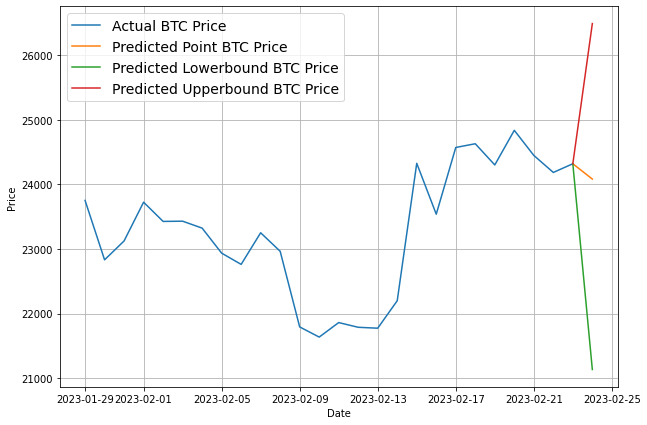

In [168]:
plt.figure(figsize=(10, 7))
plot_time_series(
    raw_data.index,
    raw_data['Price'],
    start=2950,
    format='-',
    label='Actual BTC Price'
)

plot_time_series(
    next_time_steps,
    future_forecast_plot,
    format='-',
    label='Predicted Point BTC Price'
)

plot_time_series(
    next_time_steps,
    lower_future,
    format='-',
    label='Predicted Lowerbound BTC Price'
)

plot_time_series(
    next_time_steps,
    upper_future,
    format='-',
    label='Predicted Upperbound BTC Price'
)

### Make server functions for API

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import datetime
import os

from lts import LTSCell

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7
BATCH_SIZE = 1024
COMBINED_DATA = 'D:/Uni/FYP/GitHub/BitForecast/ml/data/combined_data.csv'
ENSEMBLE_PATH = 'D:/Uni/FYP/GitHub/BitForecast/server/models/ensemble_multivariate_complete'

def get_future_dates(start_date, into_future, offset=1):
    '''
    Return dates from start_date to start_date + into_future
    Creates the dates of which the forecast was made
    '''
    
    start_date = start_date + np.timedelta64(offset, 'D')
    end_date = start_date + np.timedelta64(into_future, 'D')
    return np.arange(start_date, end_date, dtype='datetime64[D]')

def create_dataset():
    '''
    Create the required dataset format (Windowing, Cleaning & Spitting)
    '''
    
    # Import data
    data = pd.read_csv(COMBINED_DATA)

    # Clean up data
    data.drop(['Unnamed: 0'], axis=1, inplace=True)
    data.drop(['volume', 'change_percent'], axis=1, inplace=True)
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)
    data.rename(columns={ 'close': 'Price' }, inplace=True)

    # Create window datasets
    data_windowed = data.copy()
    for i in range(WINDOW_SIZE):
        data_windowed[f'Price+{i+1}'] = data_windowed['Price'].shift(periods=i+1)

    # Create X and y
    X_all = data_windowed.dropna().drop('Price', axis=1).astype(np.float32)
    y_all = data_windowed.dropna()['Price'].astype(np.float32)

    # Convert tensorflow datasets
    features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
    labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
    dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))
    dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return {
        'data': data,
        'data_windowed': data_windowed,
        'y_all': y_all,
        'X_all': X_all,
        'dataset_all': dataset_all,
    }

def create_ensemble(
    num_models=10,
    num_epochs=5000,
    horizon=HORIZON,
    loss_fns=['mae', 'mse', 'mape']
):
    '''
    Create the multivariate ensemble model (for the case of retraining)
    '''
    
    data = create_dataset()
    ensemble = []

    for i in range(num_models):
        for loss_fn in loss_fns:
            print(f'Model loss: {loss_fn} | model number: {i}')
            model = tf.keras.Sequential([
                tf.keras.layers.Input(
                    shape=(WINDOW_SIZE)
                ),
                tf.keras.layers.Lambda(
                    lambda x: tf.expand_dims(x, axis=1)
                ),
                tf.keras.layers.RNN(
                    LTSCell(16),
                    time_major=True,
                    return_sequences=True
                ),
                tf.keras.layers.LSTM(
                    16,
                    activation='relu'
                ),
                tf.keras.layers.Dense(
                    128,
                    
                    # This is required for the prediction intervals
                    kernel_initializer='he_normal',
                    activation='relu'
                ),
                tf.keras.layers.Dense(
                    128,
                    kernel_initializer='he_normal',
                    activation='relu'
                ),
                tf.keras.layers.Dense(HORIZON)
            ])

            model.compile(
                loss=loss_fn,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse']
            )

            model.fit(
                data['dataset_all'],
                epochs=num_epochs,
                verbose=0,
            )

            ensemble.append(model)

    return ensemble

def save_ensemble():
    '''
    Save ensemble
    '''
    
    for i, model in enumerate(ensemble):
        model.save(f'{ENSEMBLE_PATH}/model_{i}')
        
def load_ensemble():
    '''
    Load ensemble
    '''
    
    ensemble = [tf.keras.models.load_model(f'{ENSEMBLE_PATH}/{model}') for model in os.listdir(ENSEMBLE_PATH)]
    return ensemble

def get_upper_lower(preds):
    '''
    Create prediction uncertainty estimates, for range prediction
    '''
    
    std = tf.math.reduce_std(preds, axis=0)
    # 1.96 is the 97.5th percentile point
    interval = 1.96 * std
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

def make_future_forecasts(
    values,
    ensemble,
    into_future,
    window_size=WINDOW_SIZE
):
    '''
    Make future perdiction
    '''
    
    future_forecast = []

    for i, model in enumerate(ensemble):
        last_window = values[-window_size:] # last {WINDOW_SIZE} prices
        future_pred = tf.squeeze(
            model.predict(last_window)
        ).numpy()[-1]

        print(f'Model {i} Predicting on:\n{last_window} -> Prediction: {future_pred}')
        future_forecast.append([future_pred])
        
    return future_forecast

def forecast(
    INTO_FUTURE=1
):
    '''
    Create the forecast
    '''
    
    data = create_dataset()
    raw_data = data['data']
    ensemble = load_ensemble()

    future_forecast = make_future_forecasts(
        values=data['X_all'],
        ensemble=ensemble,
        into_future=INTO_FUTURE,
        window_size=WINDOW_SIZE
    )
    
    last_timestep = raw_data.index[-1]
    last_price = raw_data['Price'][-1]
    
    next_time_steps = get_future_dates(
        start_date=raw_data.index[-1], 
        into_future=INTO_FUTURE
    )
    
    point_future = np.median(future_forecast, axis=0)
    lower_future, upper_future = get_upper_lower(future_forecast)
    
    next_time_steps = np.insert(next_time_steps, 0, last_timestep)
    point_future = np.insert(point_future, 0, last_price)
    lower_future = np.insert(lower_future, 0, last_price)
    upper_future = np.insert(upper_future, 0, last_price)
    
    return {
        "Predicted For": next_time_steps,
        "Point Forecast": point_future,
        "Lowerbound Forecast": lower_future,
        "Upperbound Forecast": upper_future,
    }

In [172]:
tf.Tensor(24668.182)

TypeError: __init__() missing 2 required positional arguments: 'value_index' and 'dtype'